In [1]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

(array([0, 1]), array([0, 1]))

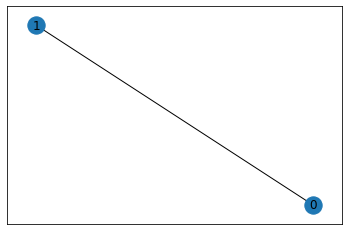

In [3]:
V = np.arange(0,2,1)
E =[(0,1,1.0)]

G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

nx.draw_networkx(G)
np.array(list(G.nodes)), V

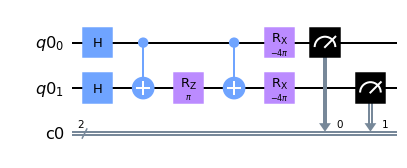

In [4]:
params={'G': G}
qaoamc = QAOAMaxCut()
qaoamc.createCircuit(np.array((np.pi,2*np.pi)),1,params=params).draw(output='mpl')

In [5]:
qasm_sim = Aer.get_backend('qasm_simulator')

In [6]:
qaoamc.sample_cost_landscape(qasm_sim, 1024, params=params, angles={"gamma": [0,2*np.pi,30], "beta": [0,np.pi,20]})

Calculating Energy landscape for depth p=1...
Calculating Energy landscape done


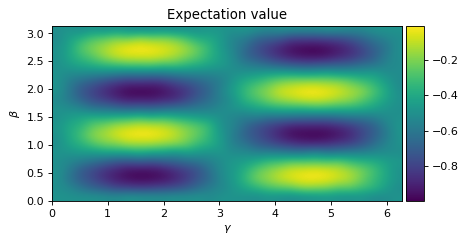

In [7]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,2*np.pi,0,np.pi])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

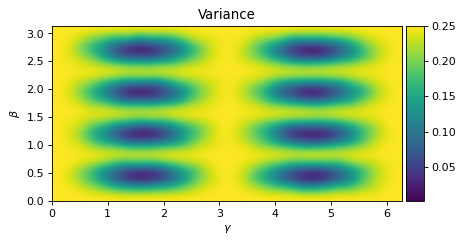

In [8]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Variance')
im = ax.imshow(qaoamc.Var,interpolation='bicubic',origin='lower',extent=[0,2*np.pi,0,np.pi])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

In [9]:
qaoamc.increase_depth(qasm_sim, 1024, params=params)
display(qaoamc.angles_hist)

rep= 0 : -0.9990234375
rep= 1 : -1.0
rep= 2 : -0.9599609375
rep= 3 : -0.9287109375
rep= 4 : -0.96484375
-1.0
[4.76655437 1.15742887]


{'d1_initial': array([4.76655437, 1.15742887]),
 'd1_final': array([4.76655437, 1.15742887])}

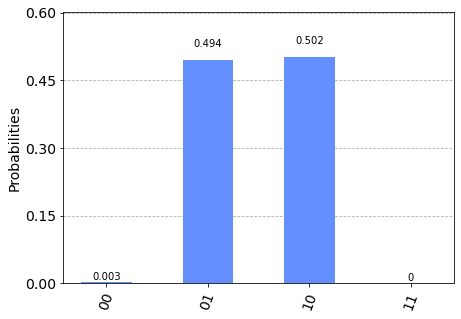

In [10]:
hist=qaoamc.hist(qaoamc.angles_hist['d1_final'], qasm_sim,1024, params=params)
plot_histogram(hist)